# Outline

- create a model that predicts the category of each article by `LogisticRegression`
- train data is `matichon.json` that contains about 16K articles of Thai news by Matichon between 2015-2018
- X is text of headline or article
- y is category (10 labels)

# Import

In [20]:
import pandas as pd
import re

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords

# Load data

- target variable is `category`
- `headline` and `article` are untokenized text

In [2]:
df = pd.read_json('data/matichon.json')
df

,headline,article,date,category,url,id
0,เปิดใจชัดๆ กับ'ชูวิทย์' สบู่ ขัน ต้องเตรียมไว้...,นายชูวิทย์ กมลวิศิษฎ์ หัวหน้าพรรครักประเทศไทย ...,2015-08-16 10:58:27,politics,https://www.matichon.co.th/politics/news_104,104
1,ลุ้นบาททะลุ40ต่อดอลล์ ปลายปี'59 เหตุสงครามค่าเ...,แบงก์ซีไอเอ็มบี ชี้การฟื้นฟูเศรษฐกิจติดปัญหารา...,2015-08-26 11:19:03,economy,https://www.matichon.co.th/economy/news_148,148
2,"ศาลสูงแอฟริกาใต้ตัดสินให้ ""พิสตอเรียสผิดฐานฆาต...",จากรายงานของบีบีซี ออสการ์ พิสตอเรียส นักวิ่งร...,2015-12-04 02:52:25,foreign,https://www.matichon.co.th/foreign/news_247,247
3,แม่แดนผู้ดีฮึด! อุ้มท้องลูกแฝดแม้รู้ไม่รอด หวั...,เอ็มมา ลี คุณแม่ชาวอังกฤษ วัย 32 ปี ตัดสินใจอุ...,2015-12-04 03:11:37,foreign,https://www.matichon.co.th/foreign/news_268,268
4,"""ผบ.สส.""นำทหารรักษาพระองค์ สวนสนามเทิดพระเกียร...",เมื่อวันที่ 3 ธ.ค. ที่มณฑลพิธีท้องสนามหลวง พล....,2015-12-04 03:38:05,politics,https://www.matichon.co.th/politics/news_295,295
...,...,...,...,...,...,...
16321,'ชาคริต-เรย์' เพื่อนซี้พ่อลูกอ่อนรวมก๊วน งานนี...,เป็นเพื่อนที่สนิทกันมาแต่ไหนแต่ไร แถมพอมีลูก ก...,2018-07-05 11:43:53,entertainment,https://www.matichon.co.th/entertainment/news_...,1029324
16322,สงขลาจัดงานสมโภช 176 ปี ศาลเจ้าพ่อหลักเมือง,วันที่ 5 ก.ค. นายสมศักดิ์ ตันติเศรณี นายก ทน.ส...,2018-07-05 10:59:53,region,https://www.matichon.co.th/region/news_1029328,1029328
16323,'สมคิด' ลั่น ไม่ใช่แค่สามมิตร แต่มีมวลหมู่มหาม...,"""สมคิด"" ลั่นไม่ใช่แค่สามมิตร แต่มีมวลหมู่มหามิ...",2018-07-05 12:09:08,politics,https://www.matichon.co.th/politics/news_1029410,1029410
16324,ม.รามฯปฐมนิเทศ นศ.ใหม่ ตั้งใจศึกษาให้สำเร็จ-มี...,ผู้ช่วยศาสตราจารย์วุฒิศักดิ์ ลาภเจริญทรัพย์ อ...,2018-07-05 13:45:34,publicize,https://www.matichon.co.th/publicize/news_1029659,1029659


In [3]:
## drop "date", "url", and "id"
df = df.drop(columns=['date','url','id'])
df.head()

,headline,article,category
0,เปิดใจชัดๆ กับ'ชูวิทย์' สบู่ ขัน ต้องเตรียมไว้...,นายชูวิทย์ กมลวิศิษฎ์ หัวหน้าพรรครักประเทศไทย ...,politics
1,ลุ้นบาททะลุ40ต่อดอลล์ ปลายปี'59 เหตุสงครามค่าเ...,แบงก์ซีไอเอ็มบี ชี้การฟื้นฟูเศรษฐกิจติดปัญหารา...,economy
2,"ศาลสูงแอฟริกาใต้ตัดสินให้ ""พิสตอเรียสผิดฐานฆาต...",จากรายงานของบีบีซี ออสการ์ พิสตอเรียส นักวิ่งร...,foreign
3,แม่แดนผู้ดีฮึด! อุ้มท้องลูกแฝดแม้รู้ไม่รอด หวั...,เอ็มมา ลี คุณแม่ชาวอังกฤษ วัย 32 ปี ตัดสินใจอุ...,foreign
4,"""ผบ.สส.""นำทหารรักษาพระองค์ สวนสนามเทิดพระเกียร...",เมื่อวันที่ 3 ธ.ค. ที่มณฑลพิธีท้องสนามหลวง พล....,politics


In [4]:
## value counts of target variable
df.category.value_counts()

politics         3008
region           2703
crime            2053
local            1706
publicize        1466
foreign          1225
sport            1193
economy          1158
education         936
entertainment     878
Name: category, dtype: int64

# Tokenize & train-test split

- it may take more than 2 minutes
- you can save the tokenized file by `df.to_json('XXX.json', orient='records')`

In [5]:
df['headline_tokens'] = df.headline.apply(word_tokenize)
df['article_tokens'] = df.article.apply(word_tokenize)

In [6]:
df.head()

,headline,article,category,headline_tokens,article_tokens
0,เปิดใจชัดๆ กับ'ชูวิทย์' สบู่ ขัน ต้องเตรียมไว้...,นายชูวิทย์ กมลวิศิษฎ์ หัวหน้าพรรครักประเทศไทย ...,politics,"[เปิดใจ, ชัด, ๆ, , กับ, ', ชู, วิทย์, ', , ส...","[นาย, ชู, วิทย์, , กมล, วิ, ศิษฎ์, , หัวหน้า..."
1,ลุ้นบาททะลุ40ต่อดอลล์ ปลายปี'59 เหตุสงครามค่าเ...,แบงก์ซีไอเอ็มบี ชี้การฟื้นฟูเศรษฐกิจติดปัญหารา...,economy,"[ลุ้น, บาท, ทะลุ, 40, ต่อ, ดอลล์, , ปลายปี, '...","[แบงก์, ซี, ไอ, เอ็ม, บี, , ชี้, การฟื้นฟู, เ..."
2,"ศาลสูงแอฟริกาใต้ตัดสินให้ ""พิสตอเรียสผิดฐานฆาต...",จากรายงานของบีบีซี ออสการ์ พิสตอเรียส นักวิ่งร...,foreign,"[ศาลสูง, แอฟริกาใต้, ตัดสิน, ให้, , ""พิ, สตอ,...","[จาก, รายงาน, ของ, บีบีซี, , ออสการ์, , พิ, ..."
3,แม่แดนผู้ดีฮึด! อุ้มท้องลูกแฝดแม้รู้ไม่รอด หวั...,เอ็มมา ลี คุณแม่ชาวอังกฤษ วัย 32 ปี ตัดสินใจอุ...,foreign,"[แม่, แดน, ผู้ดี, ฮึด, !, , อุ้มท้อง, ลูกแฝด,...","[เอ็ม, มา, , ลี, , คุณแม่, ชาว, อังกฤษ, , ว..."
4,"""ผบ.สส.""นำทหารรักษาพระองค์ สวนสนามเทิดพระเกียร...",เมื่อวันที่ 3 ธ.ค. ที่มณฑลพิธีท้องสนามหลวง พล....,politics,"["", ผบ.สส., "", นำ, ทหาร, รักษา, พระองค์, , สว...","[เมื่อ, วันที่, , 3, , ธ.ค., , ที่, มณฑล, พ..."


In [7]:
train, test = train_test_split(df, test_size=0.15, random_state=42)

print(train.shape)
print(test.shape)

(13877, 5)
(2449, 5)


# Feature Engineering


### featurize function
- input is tokenized sentence (list of str)
- output is feature dictionary `{feature: 1}` 
- bag-of-words, but binary value (not actual count, just existence)
- use *unigram only* or *unigram & bigram*
- use not only tokens, but also other features, e.g. text length

~~~python
['the','boy','love','the','dog'] 
-> {'LENGTH':5, 'the':1, 'boy':1, 'love':1, 'dog':1, 'the|boy':1, 'boy|love':1, 'love|the':1, 'the|dog':1}
~~~

In [8]:
def featurize_unigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add text length
        feat_dic['LENGTH'] = len(tokens)
    return feat_dic

def featurize_bigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add bigram
        if i < len(tokens) - 1:
            bigram = '|'.join(tokens[i:i+2]) # e.g. ฉัน|ไป
            feat_dic[bigram] = 1
        ## add text length
        feat_dic['text_length'] = len(tokens)
    return feat_dic


### all-in-one function

In [39]:
from dis import dis
from matplotlib.pyplot import cla


def train_predict(X_column_name, featurize_function_name, show_confusion_matrix=False, return_model=False):
    ## make X : featurize each record as dictionary
    X_train = train[X_column_name].apply(featurize_function_name)
    X_test = test[X_column_name].apply(featurize_function_name)

    ## make y
    y_train = train['category']
    y_test = test['category']

    ## Instantiate DictVectorizer, LogisticRegression
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('logreg', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['logreg'].classes_ # name of labels

    print(classification_report(y_test, y_pred))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
        disp.plot(xticks_rotation=80)

    # return model
    if return_model:
        return pipe

# Model Comparison

### use `headline` + unigram feature

In [38]:
train_predict('headline_tokens', featurize_unigram)

               precision    recall  f1-score   support

        crime       0.57      0.58      0.57       295
      economy       0.59      0.52      0.55       172
    education       0.71      0.58      0.64       137
entertainment       0.74      0.78      0.76       123
      foreign       0.75      0.74      0.75       194
        local       0.37      0.37      0.37       243
     politics       0.80      0.83      0.81       475
    publicize       0.76      0.81      0.78       230
       region       0.59      0.63      0.61       384
        sport       0.89      0.82      0.85       196

     accuracy                           0.67      2449
    macro avg       0.68      0.66      0.67      2449
 weighted avg       0.67      0.67      0.67      2449



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### use `headline` + bigram feature

In [11]:
train_predict('headline_tokens', featurize_bigram)

               precision    recall  f1-score   support

        crime       0.62      0.63      0.62       295
      economy       0.65      0.53      0.59       172
    education       0.67      0.60      0.63       137
entertainment       0.73      0.80      0.76       123
      foreign       0.82      0.77      0.79       194
        local       0.45      0.39      0.42       243
     politics       0.80      0.85      0.83       475
    publicize       0.79      0.84      0.81       230
       region       0.61      0.68      0.64       384
        sport       0.92      0.86      0.89       196

     accuracy                           0.71      2449
    macro avg       0.71      0.69      0.70      2449
 weighted avg       0.70      0.71      0.70      2449



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### use `article` + unigram feature

In [12]:
train_predict('article_tokens', featurize_unigram)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        crime       0.70      0.66      0.68       295
      economy       0.85      0.71      0.77       172
    education       0.76      0.65      0.70       137
entertainment       0.89      0.93      0.91       123
      foreign       0.98      0.95      0.96       194
        local       0.46      0.36      0.40       243
     politics       0.84      0.88      0.86       475
    publicize       0.72      0.85      0.78       230
       region       0.66      0.74      0.70       384
        sport       0.93      0.94      0.94       196

     accuracy                           0.77      2449
    macro avg       0.78      0.77      0.77      2449
 weighted avg       0.76      0.77      0.76      2449



### use `article` + bigram feature

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        crime       0.70      0.61      0.65       295
      economy       0.89      0.76      0.82       172
    education       0.78      0.72      0.75       137
entertainment       0.91      0.95      0.93       123
      foreign       0.95      0.95      0.95       194
        local       0.43      0.42      0.42       243
     politics       0.90      0.86      0.88       475
    publicize       0.88      0.86      0.87       230
       region       0.64      0.80      0.71       384
        sport       0.94      0.95      0.94       196

     accuracy                           0.78      2449
    macro avg       0.80      0.79      0.79      2449
 weighted avg       0.79      0.78      0.78      2449



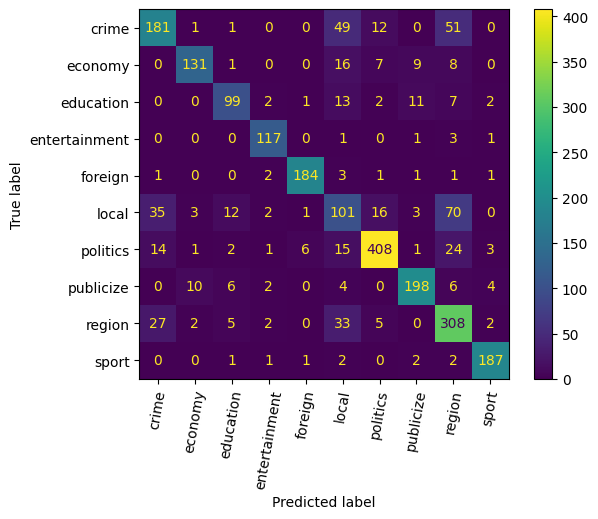

In [41]:
model = train_predict('article_tokens', featurize_bigram, return_model=True, show_confusion_matrix=True) ## return model to check coefficient

- the score of the model using `article` and bigram feature is the best
- `local` is relatively low score (confused with `region`), while `sport` and `foreign` are very high 

# check the coefficient of the model
- coefficients show "for which category, which words are important" 
- `model` is a pipeline of `DictVectorizer` and `LogisticRegression`
- feature names (vocabulary) are in `model.named_steps['dv'].get_feature_names_out()`
- coefficients are in `model.named_steps['logreg'].coef_`, which is (`number of class` * `number of features`) array
- class names are in `model.named_steps['logreg'].classes_`

In [42]:
logreg = model.named_steps['logreg']
dv = model.named_steps['dv']

coef_df = pd.DataFrame(logreg.coef_, index=logreg.classes_, columns=dv.get_feature_names_out())
coef_df

,\n,\n|,\n|,\n|,\n|,\n|,\n|,\n|,\n|,\n|,...,🤣🤣🤣,🤣🤣🤣|,🤩',🤩'|\n,🤭,🤭|,🦅,🦅|,🧐🧐🧐',🧐🧐🧐'|
crime,-0.149943,0.003958,-0.026670,-0.014312,-0.005237,-0.010718,0.002544,-0.000981,0.017418,-0.002446,...,-0.000258,-0.000258,-0.000230,-0.000230,-0.000220,-0.000220,-0.000161,-0.000161,-0.000128,-0.000128
economy,0.054815,0.004620,0.301755,0.059787,0.006448,-0.003048,-0.000739,-0.001348,-0.006467,-0.000269,...,-0.000185,-0.000185,-0.000250,-0.000250,-0.000165,-0.000165,-0.000127,-0.000127,-0.000101,-0.000101
education,-0.537101,-0.069786,-0.015420,-0.009334,-0.005805,0.003591,0.006637,-0.001226,-0.006746,-0.000263,...,-0.000394,-0.000394,-0.000309,-0.000309,-0.000190,-0.000190,-0.000148,-0.000148,-0.000102,-0.000102
entertainment,0.317735,0.106225,0.044031,0.028689,0.016216,0.012623,0.002046,-0.000332,0.005296,0.002188,...,-0.006192,-0.006192,0.002921,0.002921,0.002208,0.002208,0.002171,0.002171,0.001344,0.001344
foreign,0.172769,-0.051582,-0.032828,-0.007985,-0.003734,-0.003294,-0.000809,-0.001029,-0.005080,-0.000262,...,-0.000648,-0.000648,-0.000435,-0.000435,-0.000273,-0.000273,-0.000223,-0.000223,-0.000148,-0.000148
local,0.038415,-0.029535,-0.033639,-0.006615,-0.006444,0.008666,-0.007228,0.002891,-0.012510,0.005113,...,-0.000444,-0.000444,-0.000319,-0.000319,-0.000248,-0.000248,-0.000213,-0.000213,-0.000139,-0.000139
politics,0.087388,-0.101622,-0.062854,-0.014392,-0.005324,-0.007038,-0.000874,-0.000018,0.001672,-0.000334,...,0.008955,0.008955,-0.000375,-0.000375,-0.000411,-0.000411,-0.000890,-0.000890,-0.000349,-0.000349
publicize,-0.213819,0.213898,-0.089111,-0.010234,0.006912,0.010816,-0.000688,0.004319,-0.005406,-0.000385,...,-0.000168,-0.000168,-0.000301,-0.000301,-0.000157,-0.000157,-0.000114,-0.000114,-0.000112,-0.000112
region,0.013706,-0.094105,-0.062718,-0.017035,0.000180,-0.009043,-0.000314,-0.001398,0.016628,-0.002949,...,-0.000362,-0.000362,-0.000332,-0.000332,-0.000275,-0.000275,-0.000161,-0.000161,-0.000141,-0.000141
sport,0.216035,0.017929,-0.022547,-0.008569,-0.003213,-0.002555,-0.000575,-0.000879,-0.004804,-0.000394,...,-0.000304,-0.000304,-0.000369,-0.000369,-0.000269,-0.000269,-0.000135,-0.000135,-0.000124,-0.000124


In [43]:
## top 10 words for crime
## 9 of 10 are unigram feature
coef_df.loc['crime'].sort_values(ascending=False)[:10]

คดี                      0.482072
สำนักงานตำรวจแห่งชาติ    0.462208
 |อายุ                   0.456848
สน.                      0.429003
ถนน                      0.428496
ตร.                      0.414659
ตำรวจ                    0.413153
อายุ                     0.380555
ผู้สื่อข่าว              0.374774
ทราบ                     0.364511
Name: crime, dtype: float64

In [44]:
## top 10 words for sports
coef_df.loc['sport'].sort_values(ascending=False)[:10]

ทีม           0.938355
กีฬา          0.682856
การแข่งขัน    0.660912
 |"           0.630376
"|            0.615295
ทีม|ชาติ      0.578672
ศึก           0.575925
ฟุตบอล        0.570742
ชาติ          0.532676
"             0.530143
Name: sport, dtype: float64

# If remove stopwords/punctuations?
- there are a lot of punctuation/stopwords in the result above
- clean data and tokenize again 
- allowed token pattern is `[A-Za-z0-9ก-๙\-\.]`
- not use bigram, because many words are removed

In [17]:
STOPWORDS = thai_stopwords()

def my_tokenize(text):
    text = text.replace('\"', '') # remove double quotation
    text = text.replace('\'', '') # remove single quotation
    tokens = word_tokenize(text, keep_whitespace=False)
    tokens = [token for token in tokens if re.match(r'[A-Za-z0-9ก-๙\-\.]+', token)]
    return tokens

In [18]:
df['article_tokens'] = df.article.apply(my_tokenize)
train_predict('article_tokens', featurize_unigram)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

        crime       0.70      0.66      0.68       295
      economy       0.85      0.71      0.77       172
    education       0.76      0.65      0.70       137
entertainment       0.89      0.93      0.91       123
      foreign       0.98      0.95      0.96       194
        local       0.46      0.36      0.40       243
     politics       0.84      0.88      0.86       475
    publicize       0.72      0.85      0.78       230
       region       0.66      0.74      0.70       384
        sport       0.93      0.94      0.94       196

     accuracy                           0.77      2449
    macro avg       0.78      0.77      0.77      2449
 weighted avg       0.76      0.77      0.76      2449



- The result is almost the same as the previous uniigram model
- Removing stopwords/punctuation did not help to improve the model in this case

# Further Improvement

- To change tokenizing method may be less helpful
- Must modify featurize function
    - each category has some specific characteristics except for word itself
    - e.g. `economy` may contain many digit characters -> try to use the feature such as `digit_char_ratio` 
- show confusion matrix in oreder to detect which label is often misunderstood for which label